In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()
Pkg.update()
Pkg.add("Plots")

  Activating environment at `~/CropModeling/Garttuce/Project.toml`


    Updating registry at `~/.julia/registries/General`


   Installed Distributions ─ v0.25.50


  No Changes to `~/CropModeling/Garttuce/Project.toml`
    Updating `~/CropModeling/Garttuce/Manifest.toml`
  [31c24e10] ↑ Distributions v0.25.49 ⇒ v0.25.50


Precompiling 

project...


  ✓ Distributions


  ✓ KernelDensity


  ✓ BlackBoxOptim


  ✓ Gadfly


  ✓ Cropbox


  ✓ Garttuce
  6 dependencies successfully precompiled in 33 seconds (226 already precompiled)


   Resolving package versions...


  No Changes to `~/CropModeling/Garttuce/Project.toml`
  No Changes to `~/CropModeling/Garttuce/Manifest.toml`


In [2]:
using Cropbox
using Test
using Plots
using TimeZones
using DataFramesMeta
using CSV
# Cropbox.Interact.WebIO.setup(:ijulia)

In [3]:
include("../src/Garlic.jl")

import Dates

┌ Warning: duplicate variable
│   system = Mass
│   name = living_total_mass
│   alias = nothing => nothing
│   state = :Track => :Track
└ @ Cropbox /home/cariso27001/.julia/packages/Cropbox/2CDya/src/macro.jl:589


In [4]:
Lettuce = @config (
# # CV PHYL ILN GLN LL LER SG SD LTAR LTARa LIR Topt Tceil critPPD
# KM1 134 4 10 65.0 4.70 1.84 122 0 0.4421 0.1003 22.28 34.23 12
    :Phenology => (
        emergence_optimal_temperature = 15.0,
        emergence_ceiling_temperature = 28.0,
        # optimal_temperature = 22.28, # Topt
        optimal_temperature = 15, # Topt
        # ceiling_temperature = 34.23, # Tceil
        ceiling_temperature = 28, # Tceil
        critical_photoperiod = 24, # critPPD
        # critical_photoperiod = 12, # critPPD
        # initial_leaves_at_harvest = 5, # ILN
        # maximum_leaf_initiation_rate = 0.8, # LIR
        maximum_leaf_initiation_rate = 0.943214,
        # maximum_emergence_rate = 0.2,
        maximum_emergence_rate = 0.02,
        # maximum_leaf_initiation_rate = 0.1003, # LIR
        # storage_days = 100, # SD
        # storage_temperature = 5,
        # maximum_phyllochron_asymptote = 0.4421, # LTARa
        maximum_phyllochron_asymptote = 0.802838,
        # leaves_generic = 10, # GLN
        leaves_generic = 30, # GLN
        # storage_days = 122, # SD
        planting_date = ZonedDateTime(2021, 10, 12, tz"Asia/Taipei"), # Y1 sow
        emergence_date = ZonedDateTime(2021, 10, 24, tz"Asia/Taipei"), # Y1 emg
        # scape_removal_date = nothing, # Y2 SR
    ),
    :Leaf => (
        maximum_elongation_rate = 4.70, # LER
        # minimum_length_of_longest_leaf = 25.0, # LL
        minimum_length_of_longest_leaf = 15.0, # LL
        # stay_green = 1.84, # SG
        stay_green = 30,
        length_to_width_ratio = 0.8,
    ),
    :Carbon => (
# # Rm Yg
# 0.012 0.8
        # maintenance_respiration_coefficient = 0.012, # Rm
        maintenance_respiration_coefficient = 0.012, # Rm
        # synthesis_efficiency = 0.8, # Yg
        synthesis_efficiency = 0.8, # Yg
        partitioning_table = [
        # # root leaf sheath scape bulb
        #   0.00 0.00   0.00  0.00 0.00 ; # seed garlic before germination
        #   0.35 0.30   0.25  0.00 0.10 ; # vegetative stage between germination and scape initiation
        #   0.15 0.15   0.10  0.25 0.35 ; # period between scape initiation and scape appearance
        #   0.05 0.10   0.00  0.35 0.50 ; # period after scape appearance before removal (scape stays intact)
        #   0.05 0.00   0.00  0.00 0.95 ; # period after scape removal (scape appeared and subsequently removed)
        #   0.00 0.00   0.00  0.00 0.00 ; # dead
        # ],
        # root leaf stem
          0.00 0.00 0.00 ; # seed garlic before germination
          0.15 0.60 0.25 ; # vegetative stage
          0.00 0.00 0.00 ; # dead
        ],
    ),
    :Meta => (cultivar = :Cucumber,
        year = 2021,),
    :Weather => (
        CO2 = 390, # CO2
        store = Garlic.loadwea("$(@__DIR__)/../data/winter2021.wea", tz"Asia/Taipei"),
    ),
    :Plant => (initial_planting_density = 55,),
    :Calendar => (
        init = ZonedDateTime(2021, 10, 12, 18, tz"Asia/Taipei"), # Y1 bgn
        last = ZonedDateTime(2021, 12, 19, tz"Asia/Taipei"), #Y2 end
    ),
)

Config for 7 systems:
  Phenology
    emergence_optimal_temperature = 15.0
    emergence_ceiling_temperature = 28.0
    optimal_temperature           = 15
    ceiling_temperature           = 28
    critical_photoperiod          = 24
    maximum_leaf_initiation_rate  = 0.943214
    maximum_emergence_rate        = 0.02
    maximum_phyllochron_asymptote = 0.802838
    leaves_generic                = 30
    planting_date                 = ZonedDateTime(2021, 10, 12, tz"Asia/Taipei")
    emergence_date                = ZonedDateTime(2021, 10, 24, tz"Asia/Taipei")
  Leaf
    maximum_elongation_rate        = 4.7
    minimum_length_of_longest_leaf = 15.0
    stay_green                     = 30
    length_to_width_ratio          = 0.8
  Carbon
    maintenance_respiration_coefficient = 0.012
    synthesis_efficiency                = 0.8
    partitioning_table                  = [0.0 0.0 0.0; 0.15 0.6 0.25; 0.0 0.0 0.0]
  Meta
    cultivar = :Cucumber
    year     = 2021
  Weather
    CO2   = 390

In [5]:
obs_leafnum = CSV.read("$(@__DIR__)/../data/winter2021_leafnum_consistent.csv", DataFrame) |> unitfy

f(s) = s.DAP' in obs_leafnum.DAP && Dates.hour(s.calendar.time') == 12
# r = simulate(Garlic.Model;
calibrate(Garlic.Model, obs_leafnum;
    config=Lettuce,
    stop="calendar.count",
    index=:DAP,
    target=:Appeared => :leaves_appeared,
    parameters= :Phenology => (;
        :LTARa_max => (0.01, 1.50),
        maximum_leaf_initiation_rate = (0.2, 1.5),
    ),
    snap=f,
    metric=:rmse,
    optim=(:MaxSteps => 3,),
)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps



Optimization stopped after 4 steps and 12.15 seconds
Termination reason: Max number of steps (3) reached
Steps per second = 0.33
Function evals per second = 0.66
Improvements/step = 1.33333
Total function evaluations = 8


Best candidate found: [0.802838

, 0.943214]

Fitness: 0.000000000



Config for 1 system:
  Phenology
    LTARa_max                    = 0.802838
    maximum_leaf_initiation_rate = 0.943214

Progress:  53%[==============>            ]  ETA: 0:00:01 ( 1.35 ms/it)

Progress:  99%[==========================>]  ETA: 0:00:00 ( 1.40 ms/it)

Progress: 100%[===========================] Time: 0:00:02 ( 1.40 ms/it)


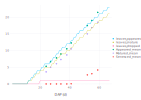

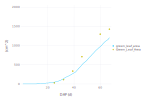

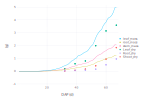

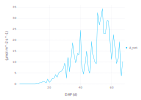

In [15]:
obs_drymass = CSV.read("$(@__DIR__)/../data/winter2021_DryMass.csv", DataFrame) |> unitfy
obs_area = CSV.read("$(@__DIR__)/../data/winter2021_Area.csv", DataFrame) |> unitfy
obs_leafnum = CSV.read("$(@__DIR__)/../data/winter2021_leafnum_consistent.csv", DataFrame) |> unitfy

r = simulate(Garlic.Model;
    config=Lettuce,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
)
@test r.leaves_initiated[end] > 0

sln = visualize(r, :DAP, [:leaves_appeared, :leaves_mature, :leaves_dropped], kind=:line) # Fig. Leaf Number
visualize!(sln, obs_leafnum, :DAP, [:Appeared_mean, :Matured_mean, :Senesced_mean]) |> display # Fig. Leaf Area
sa = visualize(r, :DAP, :green_leaf_area, kind=:line, ylim = (0,2000))
visualize!(sa, obs_area, :DAP, [:Green_Leaf_Area]) |> display # Fig. Leaf Area
sb = visualize(r, :DAP, [:leaf_mass, :root_mass, :stem_mass], kind=:line)
visualize!(sb, obs_drymass, :DAP, [:Leaf_dry, :Root_dry, :Shoot_dry]) |> display # Fig. Biomass
visualize(r, :DAP, [:A_net], kind=:line) |> display

In [7]:
CSV.write("$(@__DIR__)/../SimExport.csv", r)

"/home/cariso27001/CropModeling/Garttuce/test/../SimExport.csv"

In [8]:
# Cropbox.Unitful.ustrip.(r)

In [17]:
evaluate(obs_leafnum, r; index = :DAP, target = :Appeared_mean => :leaves_appeared, metric=:ef) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Appeared_mean => :leaves_appeared, metric=:rmse) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Matured_mean => :leaves_mature, metric=:ef) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Matured_mean => :leaves_mature, metric=:rmse) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_mean => :leaves_dropped, metric=:ef) |> display
evaluate(obs_leafnum, r; index = :DAP, target = :Senesced_mean => :leaves_dropped, metric=:rmse) |> display

evaluate(obs_area, r; index = :DAP, target = :Green_Leaf_Area => :green_leaf_area, metric=:ef) |> display
evaluate(obs_area, r; index = :DAP, target = :Green_Leaf_Area => :green_leaf_area, metric=:rmse) |> display

evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:ef) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Leaf_dry => :leaf_mass, metric=:rmse) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Shoot_dry => :shoot_mass, metric=:ef) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Shoot_dry => :shoot_mass, metric=:rmse) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:ef) |> display
evaluate(obs_drymass, r; index = :DAP, target = :Root_dry => :root_mass, metric=:rmse) |> display

0.9629121176089072

0.9521516059279422

0.9566487764917632

0.988572571919288

-Inf

1.6050027483370162

0.8158552801185097

184.48725592955483 cm^2

0.7760460010255611

0.7628279064964095 g

-1.073596099589702

3.272409447404318 g

0.307585160020034

0.33532841321932005 g